In [171]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv('Census Income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [173]:
df.shape

(32560, 15)

In [174]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [175]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [176]:
#Checking the number of '0' values in the list. 
df.isin([0]).sum()

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64

Observation: 

    We have a total of 32560 rows in the dataset.
    Out of which 29849 Capital_gain values and 31041 Capital_loss values are '0', which renders the two columns irrelevant. 

In [177]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [178]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

Since there are high number of zeros in the list, I'm opting to remove those two columns. Mean, Median, Mode, or IQR will only give fake values which will direct the accuracy of the model in an undesired direction. 

### Removing unwanted columns

In [179]:
df.drop(['Capital_gain', 'Capital_loss', 'Education_num'], inplace = True, axis = 1)

In [180]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


### Finding unique values

In [181]:
for i in df.columns:
    a = df[i].nunique()
    print('Unique values in ', i, '=', a)

Unique values in  Age = 73
Unique values in  Workclass = 9
Unique values in  Fnlwgt = 21647
Unique values in  Education = 16
Unique values in  Marital_status = 7
Unique values in  Occupation = 15
Unique values in  Relationship = 6
Unique values in  Race = 5
Unique values in  Sex = 2
Unique values in  Hours_per_week = 94
Unique values in  Native_country = 42
Unique values in  Income = 2


In [182]:
#Splitting as per type
categ_cols = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']
numer_cols = ['Age', 'Fnlwgt', 'Hours_per_week']
to_be_enc = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

Observation: 

    Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, and Native_country will have to be encoded.
    Since there are a lot of categorical values, we will have to check the number and types of uniqe values in each column. 

In [183]:
#Checking the individual unique values in each columns. 
for i in range(len(categ_cols)):
    print("----- {}-----".format(categ_cols[i]))
    print(df[categ_cols[i]].value_counts()) 

----- Workclass-----
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----- Education-----
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----- Marital_status-----
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
--

Observation: 

    We can see that there are '?' in some columns. 
        Workclass
        Occupation
        Native_country
        
    For the column workclass, we can change the '?' to Private using mode.
    For Occupation, '?' can be merged to Other-services, I'll be using ffill. 
    For Native_country, we can use most_frequent/mode to impute, this will add the 586 values to United States

### Handling unique values

In [184]:
#First we are replacing '?' with NaN
df.replace(' ?', np.nan, inplace = True)

In [185]:
for i in range(len(categ_cols)):
    print("----- {}-----".format(categ_cols[i]))
    print(df[categ_cols[i]].value_counts()) 

----- Workclass-----
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----- Education-----
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----- Marital_status-----
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
----- Occupation-----
 Prof-s

In [186]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Now that we have changed all the '?' to NaN, we can replace them. 

In [187]:
from sklearn.impute import SimpleImputer

In [188]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Workclass'] = si.fit_transform(df['Workclass'].values.reshape(-1, 1))
df['Native_country'] = si.fit_transform(df['Native_country'].values.reshape(-1, 1))

In [189]:
#Using Ffill to impute the Occupation column. 
df['Occupation'].fillna(method='ffill', inplace=True)

### Univariate Analysis

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


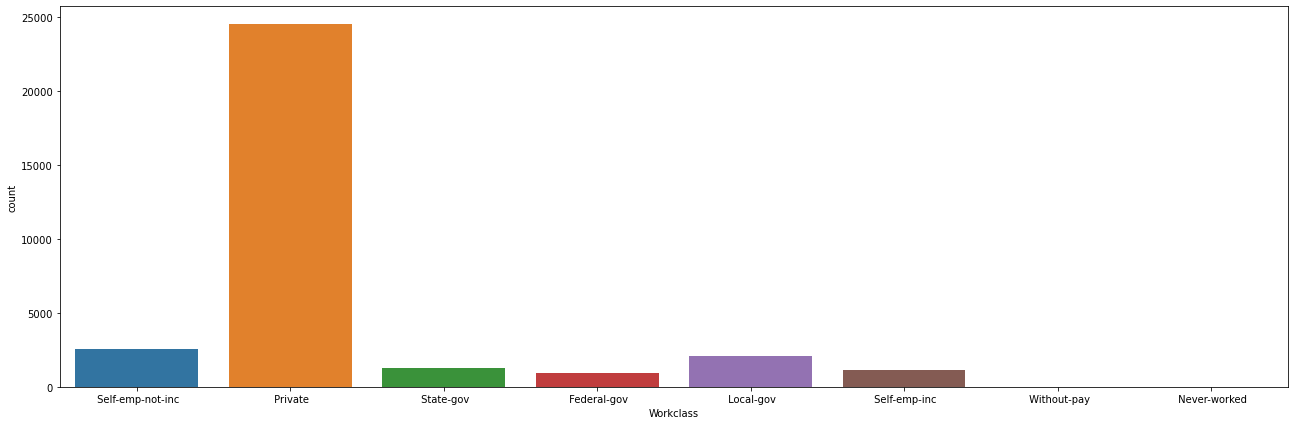

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


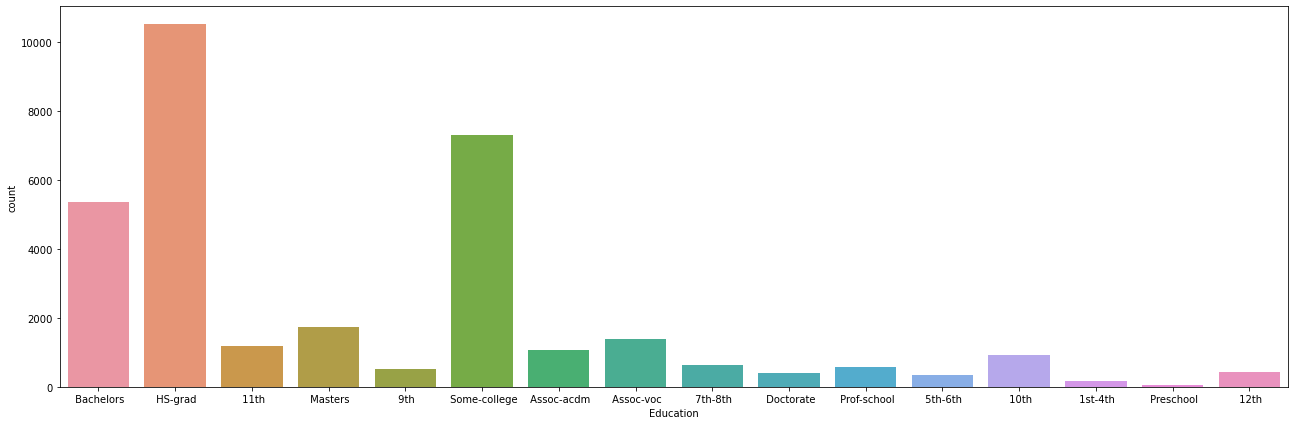

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


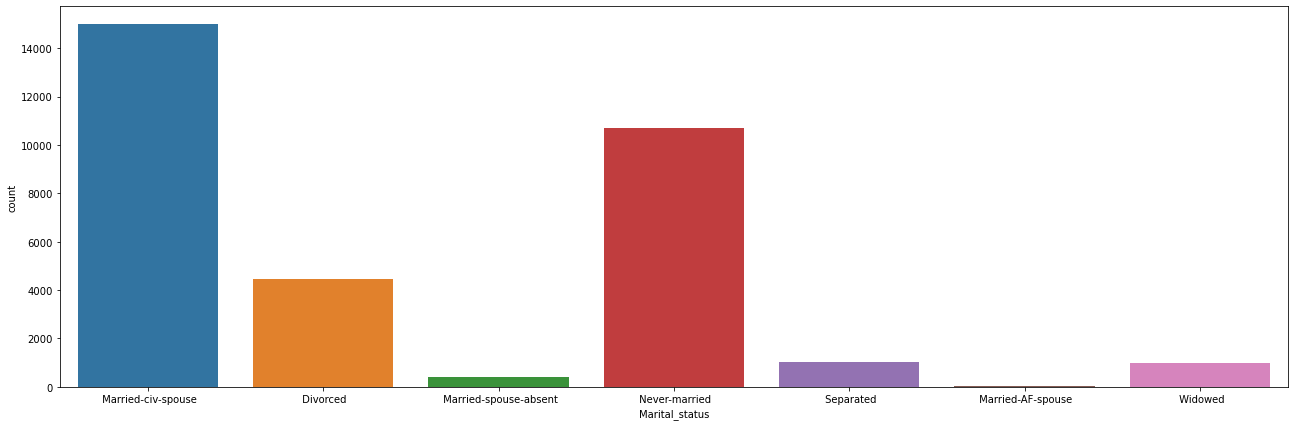

 Prof-specialty       4386
 Craft-repair         4364
 Exec-managerial      4317
 Adm-clerical         3981
 Sales                3863
 Other-service        3470
 Machine-op-inspct    2134
 Transport-moving     1703
 Handlers-cleaners    1471
 Farming-fishing      1038
 Tech-support          981
 Protective-serv       683
 Priv-house-serv       159
 Armed-Forces           10
Name: Occupation, dtype: int64


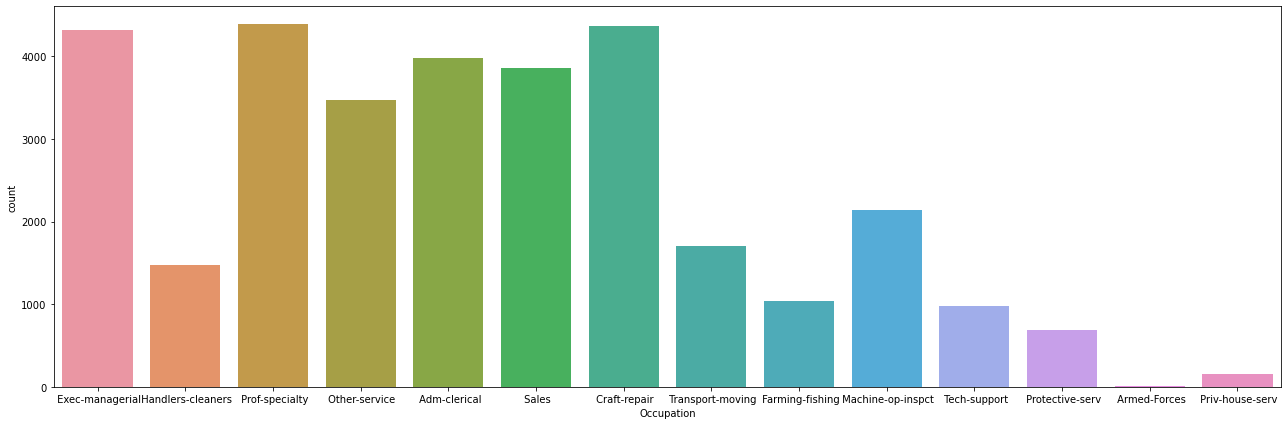

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


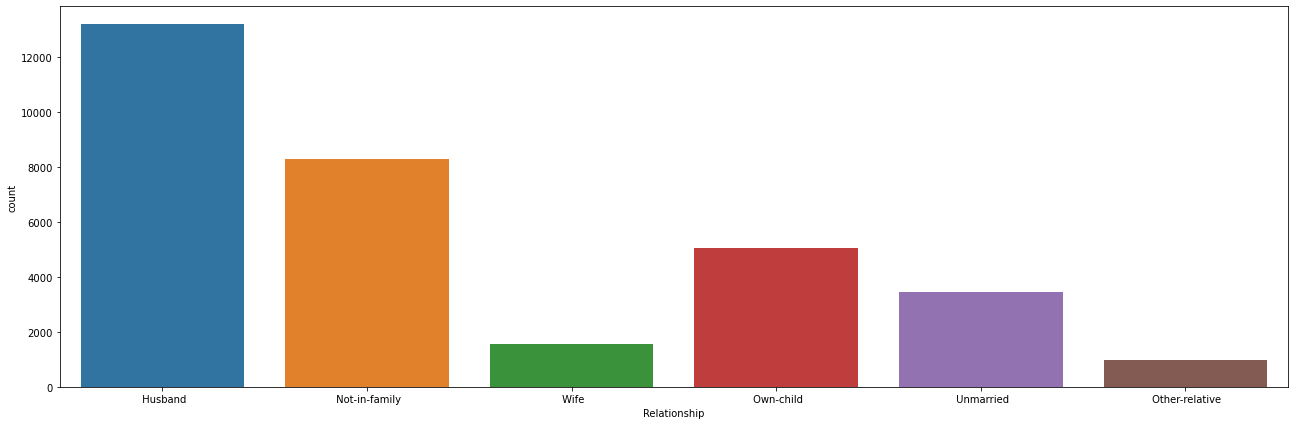

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


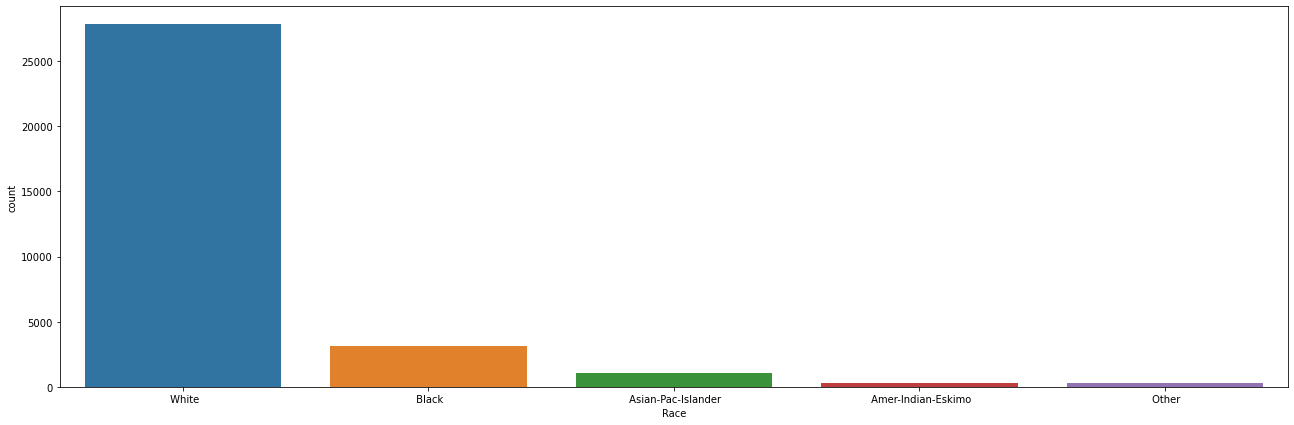

 Male      21789
 Female    10771
Name: Sex, dtype: int64


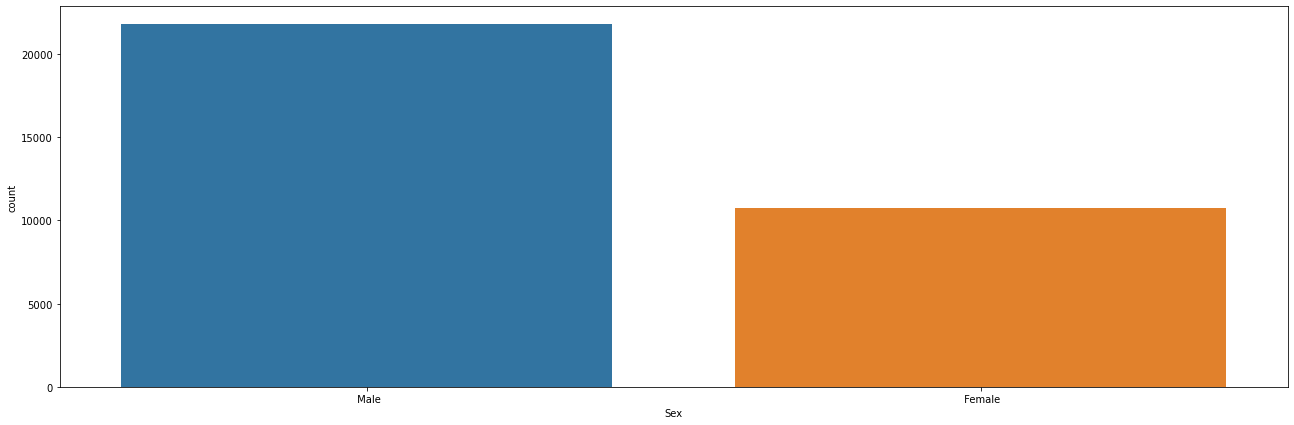

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

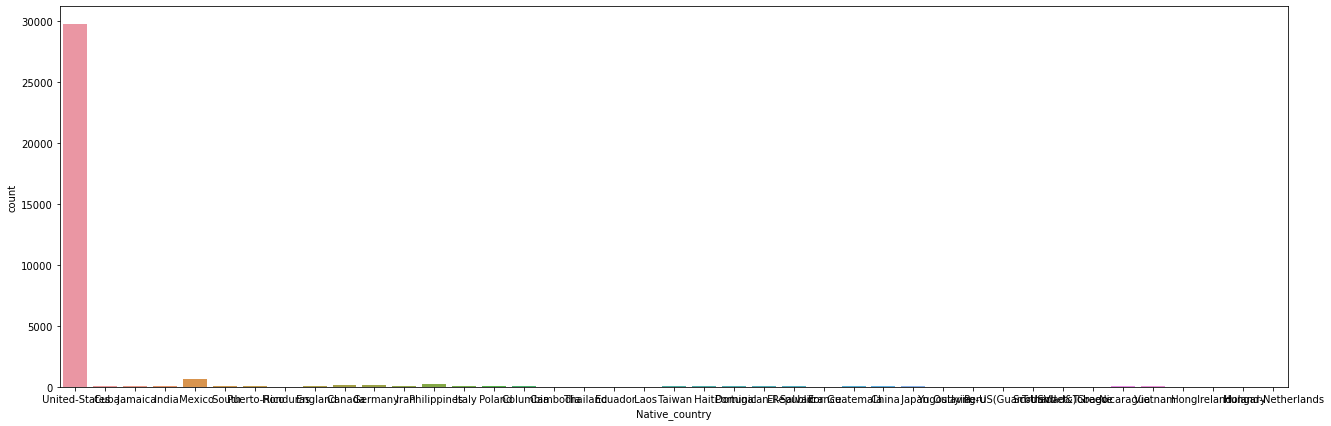

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


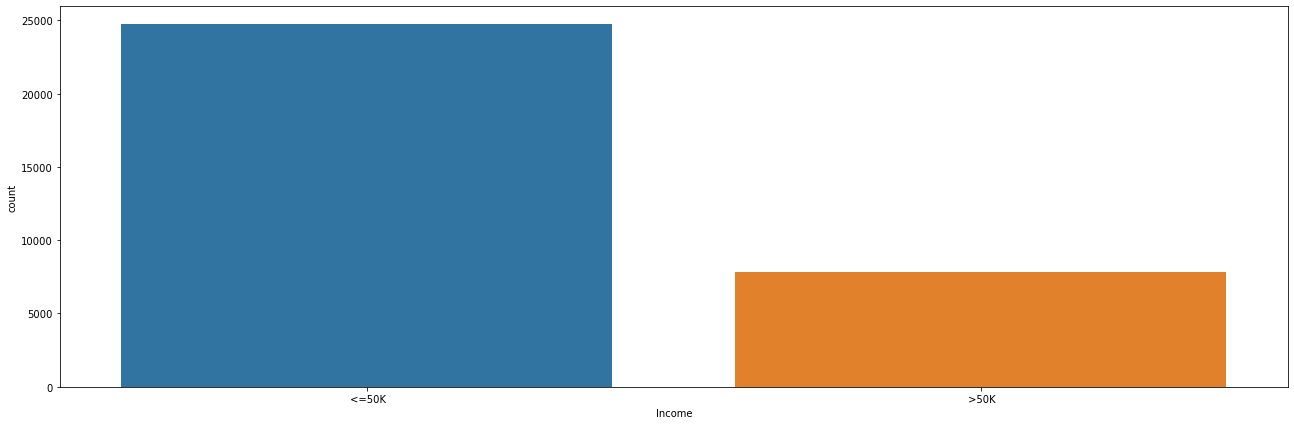

In [190]:
for i in categ_cols:
    plt.figure(figsize = (22,7))
    ax = sb.countplot(x = i, data = df)
    print(df[i].value_counts())
    plt.show()

Observation:

    We can see that the highest number of people working are in private sectors. This greatly overshadows all other sections. 
    The highest number of people have completed HS-grade education, seconded by the group which has some-college education. The third highest number of people have bachelors degree. 
    The higest number of people are married or with civil spouses, seconded by the group of people who never married, followed by divorcees. 
    When looking at the people in different types of job sectors, Tech-support(981), Protective-serv (683), Priv-house-serv (159), and Armed-Forces (10) are the lowest. 
    When looking at the relationship column. the number of husbands reported are at the higest, seconded by not-in family and own-child. 
    Most of the people in this dataset are white. 
    Most of the people in this dataset are men. 
    The highest number of columns in the dataset are from United States.
    The highest number of people earn less than 50k in salary. 

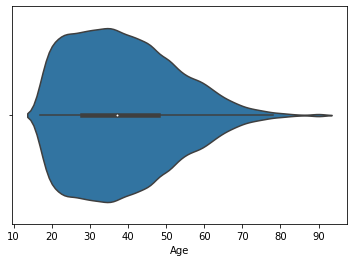

In [191]:
sb.violinplot(x = 'Age', data = df)
plt.show()

We can see that the highest number of people are in the 15-60 Age groups. 

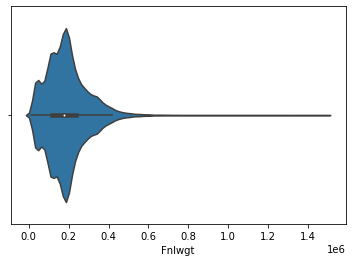

In [192]:
sb.violinplot(x = 'Fnlwgt', data = df)
plt.show()

Unable to make observations from Final weight column. There are outliers present in it. 

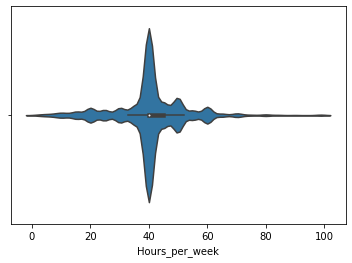

In [193]:
sb.violinplot(x = 'Hours_per_week', data = df)
plt.show()

The highest number of people work 40 hours per week on average, some do more than 100, which are outliers. 

### `Bivariate Analysis

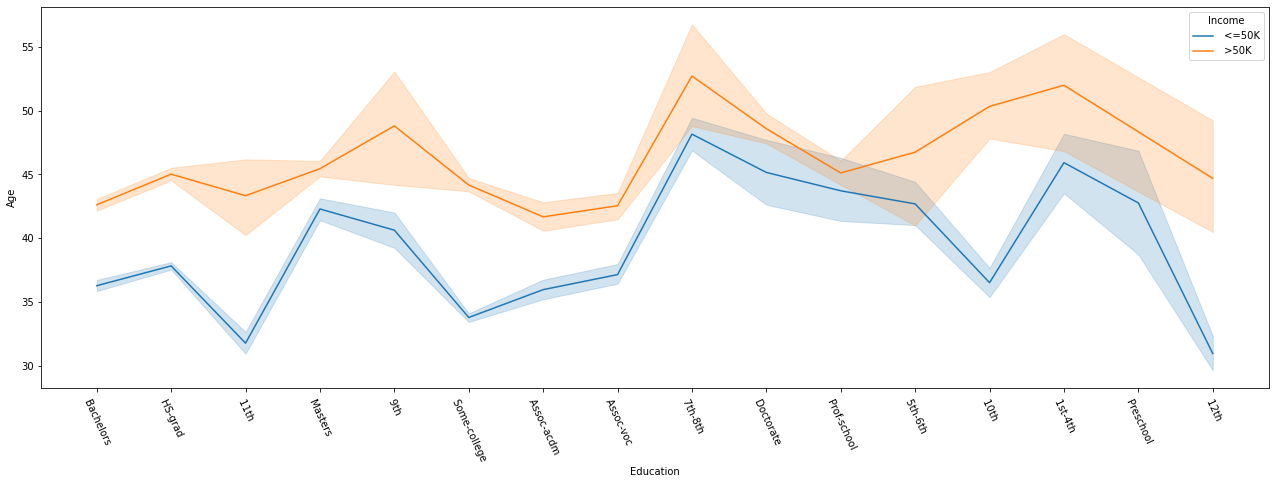

In [194]:
plt.figure(figsize = (22,7))
sb.lineplot(x="Education", y="Age", hue = 'Income', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Observation: 

    From the graph above we can see that Age is definitely a factor in the salary segment, however, it also depends on the education qualification. 
    We can see that there are people who has completed pre-school working in high salary segments. 

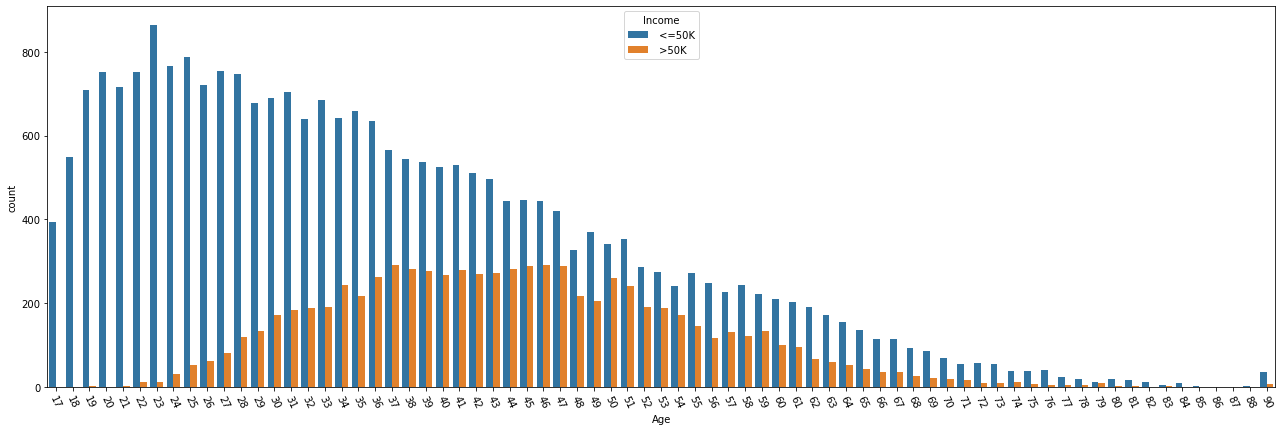

In [195]:
plt.figure(figsize = (22,7))
sb.countplot(df['Age'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that the higest number of people earnings less than 50k per year are highest below 50 years of age. 
    
    The number of people earnings more than 50k are in between 34 to 54 age group.

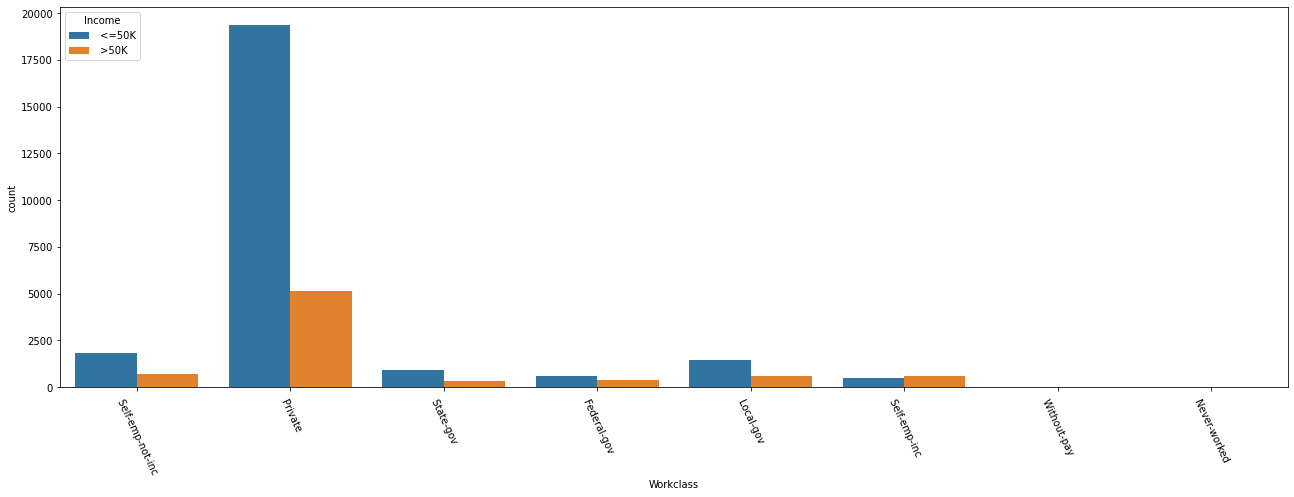

In [196]:
plt.figure(figsize = (22,7))
sb.countplot(df['Workclass'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that private employess has the higheset difference between low paid and highly paid workers. 

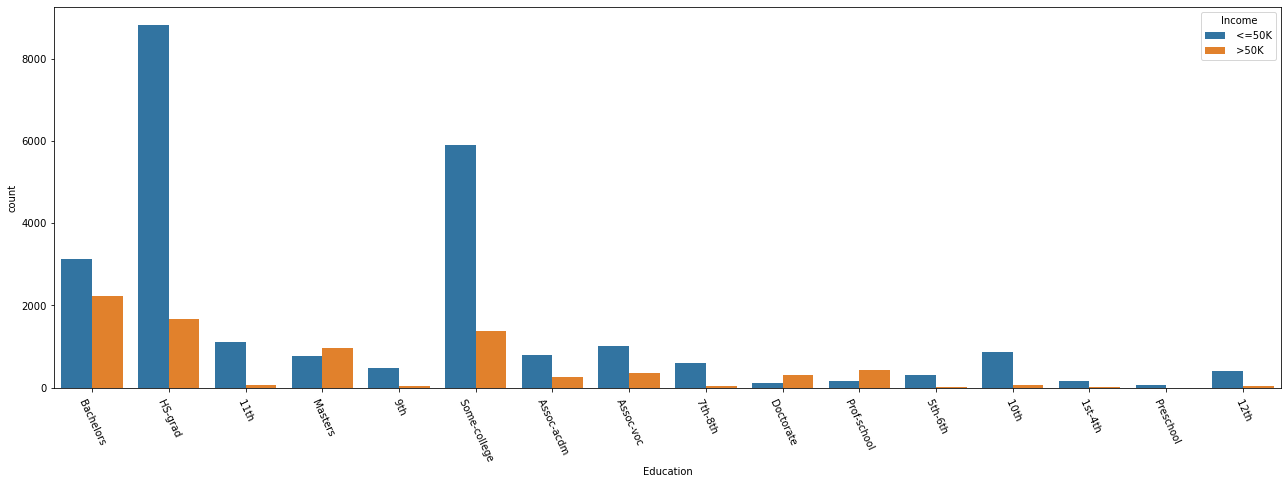

In [197]:
plt.figure(figsize = (22,7))
sb.countplot(df['Education'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    We can see that most of the HS and some college individuals are earning the lowest wages. This also applies to 5th, 10th, 12th and prescool pass. 

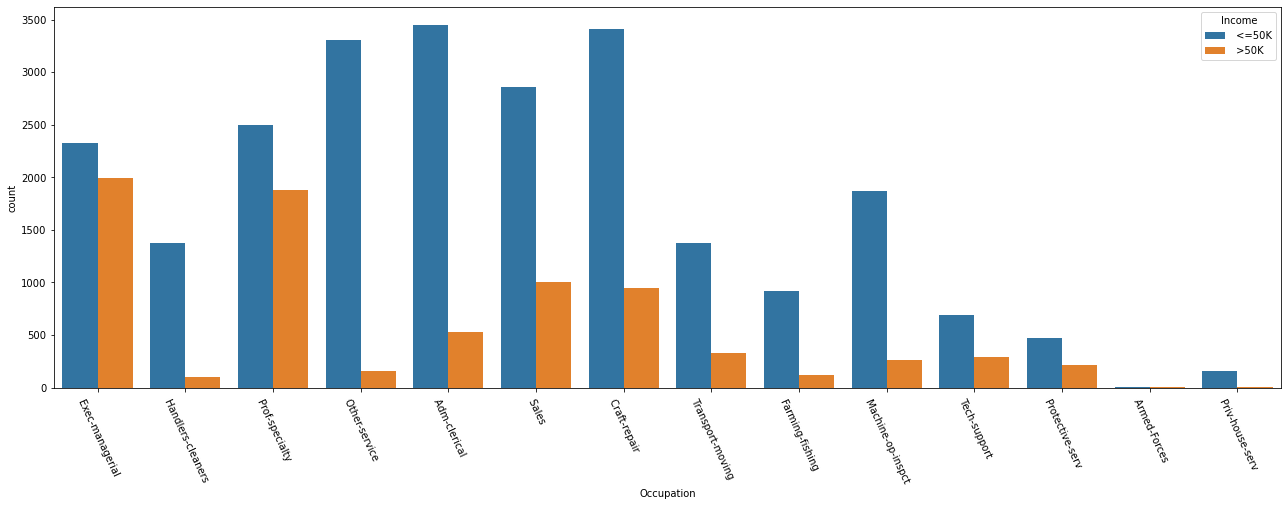

In [198]:
plt.figure(figsize = (22,7))
sb.countplot(df['Occupation'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    Exec-managerial, prof-speciality, sales and craft-repair workers are the groups which have a chance of getting paid more than 50k the highest. 


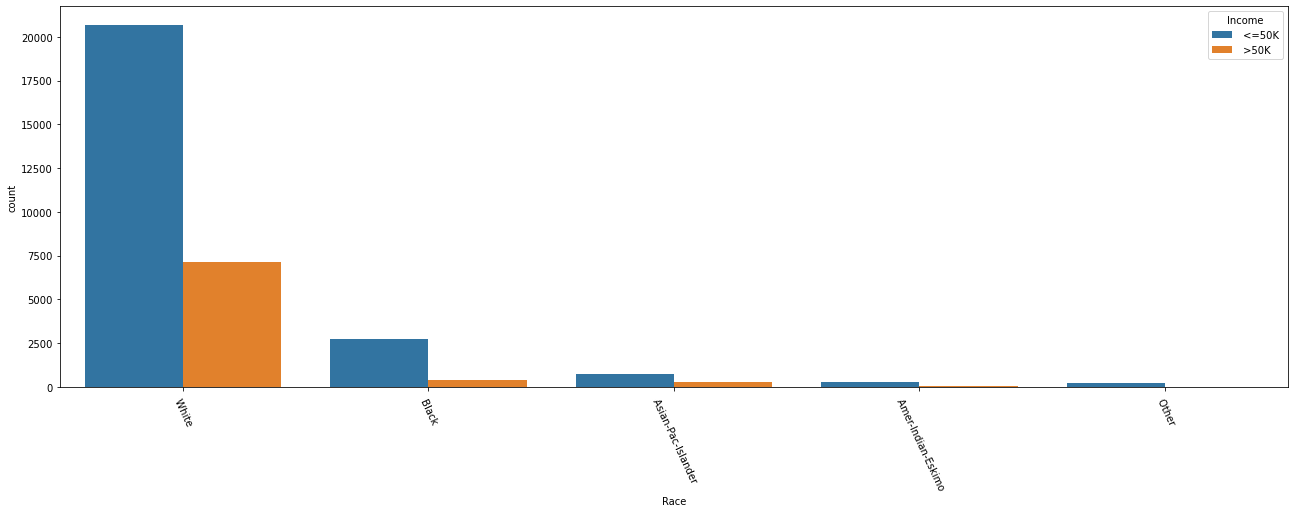

In [199]:
plt.figure(figsize = (22,7))
sb.countplot(df['Race'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    Extrapolated info from this graph may not be accurate as the whole dataset contains mostly white race's details

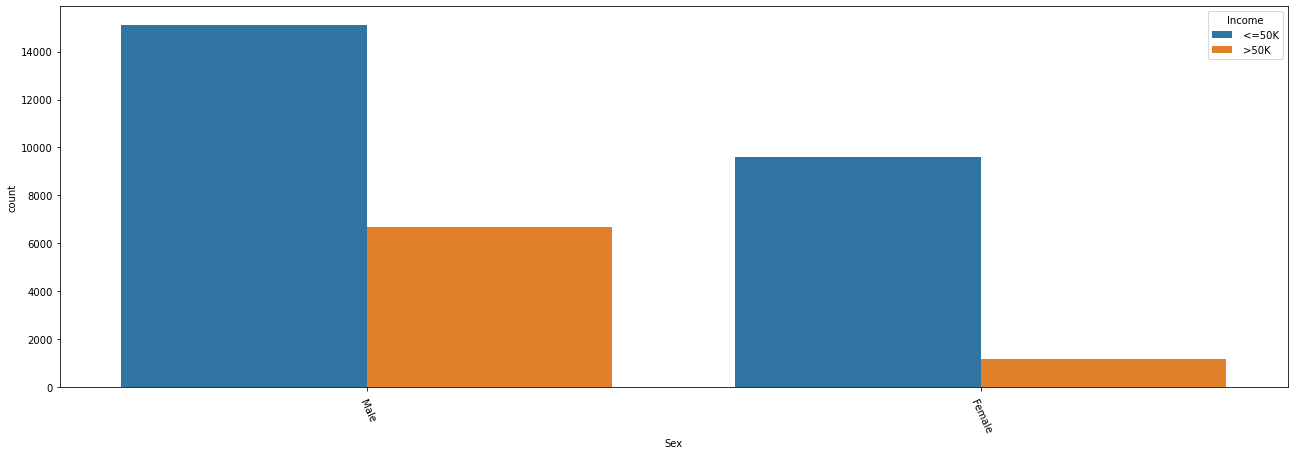

In [200]:
plt.figure(figsize = (22,7))
sb.countplot(df['Sex'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    Men get paid more when compared to women. 

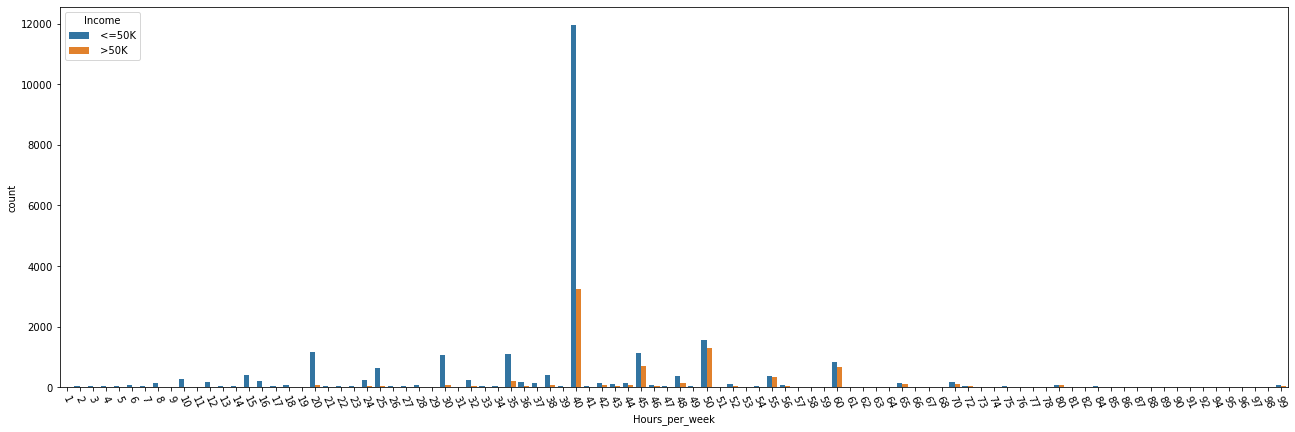

In [201]:
plt.figure(figsize = (22,7))
sb.countplot(df['Hours_per_week'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    Most of the people tend to work 40 hours per week, with the extreme being some working upto 100 hours a week. 

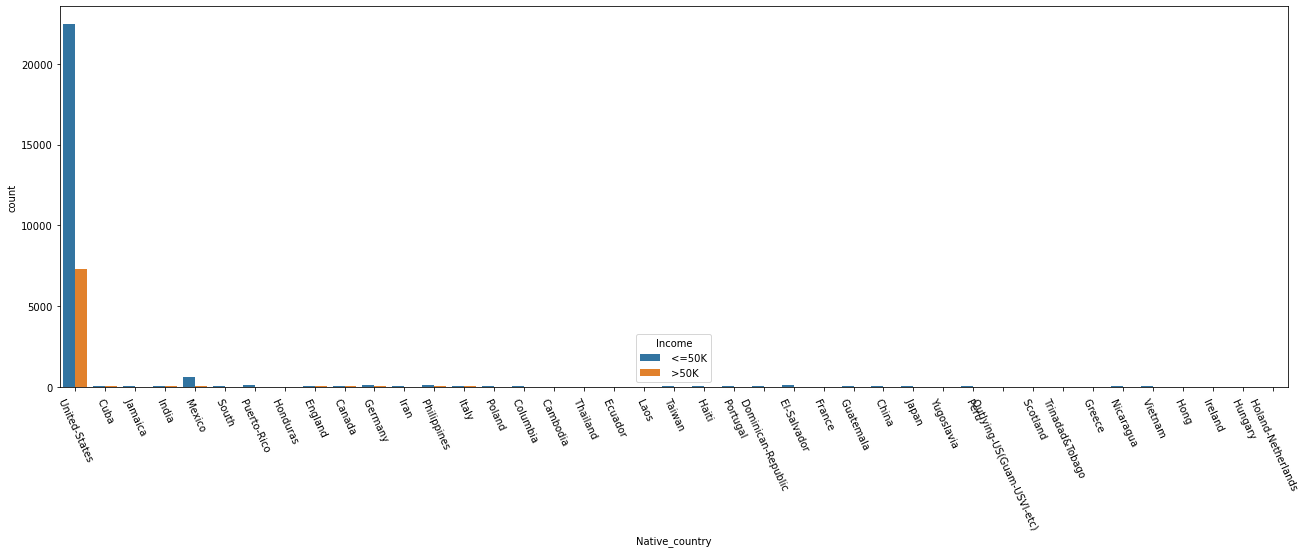

In [202]:
plt.figure(figsize = (22,7))
sb.countplot(df['Native_country'],hue=df["Income"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    Extrapolated info from this graph may not be accurate as the whole dataset contains mostly white race's details

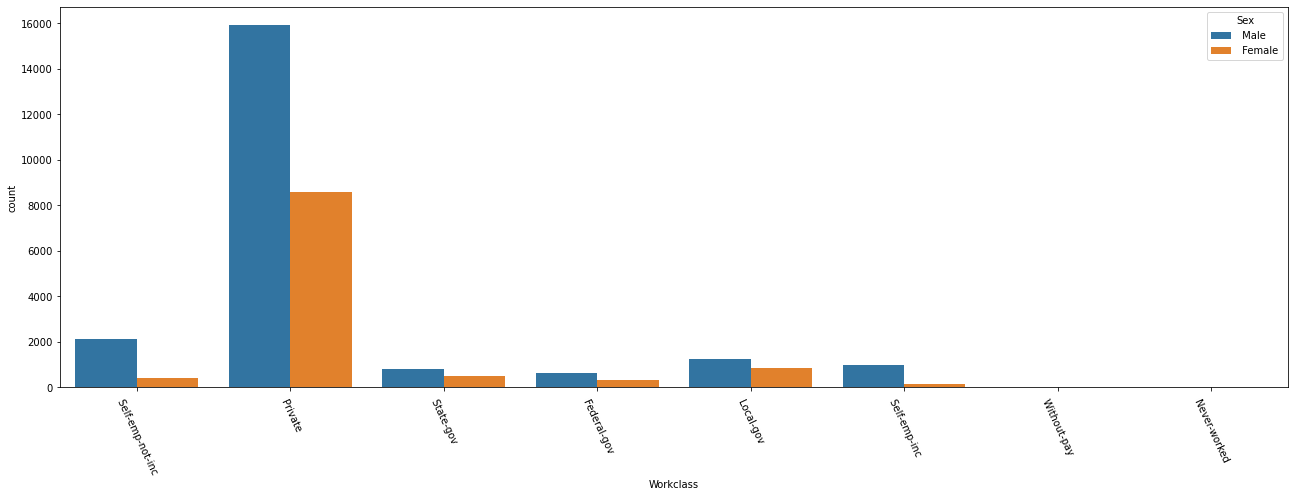

In [203]:
plt.figure(figsize = (22,7))
sb.countplot(df['Workclass'],hue=df["Sex"])
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

    Male-female ratio is the lowest in state-gov and local-gov run work places. the highest difference can be seen in self-emp 

<Figure size 1584x504 with 0 Axes>

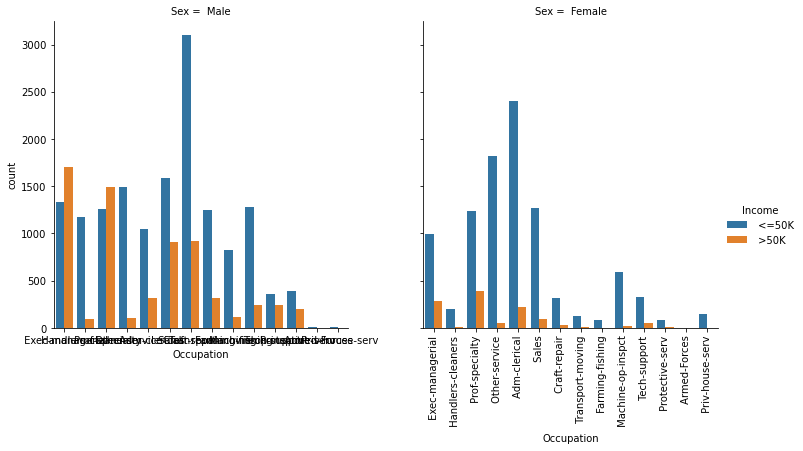

In [204]:
plt.figure(figsize = (22,7))
sb.catplot(x="Occupation", hue="Income", col="Sex", data=df, kind="count")
plt.xticks(rotation ='vertical')
plt.show()

    Here we can see that the highest number of men work in craft-repair, and women in admin/clerical.
    
    The salary gap can be clearly seen in this graph.

### Summary

In [205]:
df.describe()

,Age,Fnlwgt,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000
mean,38.581634,1.897818e+05,40.437469
std,13.640642,1.055498e+05,12.347618
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.178315e+05,40.000000
50%,37.000000,1.783630e+05,40.000000
75%,48.000000,2.370545e+05,45.000000
max,90.000000,1.484705e+06,99.000000


<AxesSubplot:>

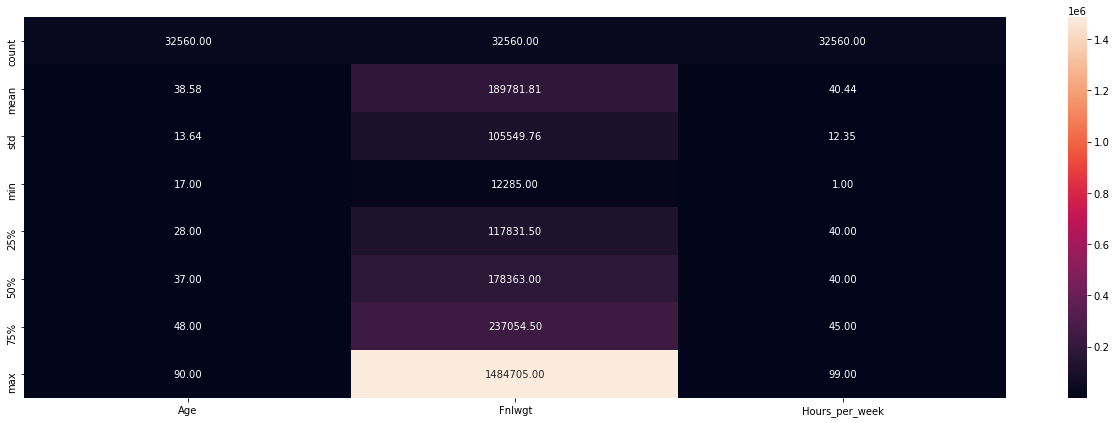

In [206]:
plt.figure(figsize = (22,7))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

    We can see that the highest difference in values is in the fnlwght column.
    The values in all other columns look normally distributed.

In [207]:
df.describe(include=["object"])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,4386,13193,27815,21789,29752,24719


### Encoding

In [208]:
#Encoding using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [209]:
enc = OrdinalEncoder()

In [210]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [211]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,2.0,3.0,0.0,4.0,1.0,13,38.0,0.0
1,38,3.0,215646,11.0,0.0,5.0,1.0,4.0,1.0,40,38.0,0.0
2,53,3.0,234721,1.0,2.0,5.0,0.0,2.0,1.0,40,38.0,0.0
3,28,3.0,338409,9.0,2.0,9.0,5.0,2.0,0.0,40,4.0,0.0
4,37,3.0,284582,12.0,2.0,3.0,5.0,4.0,0.0,40,38.0,0.0


### Correlation

In [212]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,-0.266292,-0.008484,-0.263698,0.028718,0.088832,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,-0.020545,0.010984,-0.057931,0.048323,0.071535,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,0.028184,0.000809,0.008922,-0.021278,0.026882,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,-0.038398,-0.033580,-0.010879,0.014135,-0.027349,0.055510,0.076062,0.079311
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,1.000000,0.022909,0.185461,-0.068025,-0.129337,-0.190521,-0.021285,-0.199295
Occupation,-0.008484,0.010984,0.000809,-0.033580,0.022909,1.000000,-0.048628,0.000402,0.057018,0.014839,-0.003925,0.047042
Relationship,-0.263698,-0.057931,0.008922,-0.010879,0.185461,-0.048628,1.000000,-0.116052,-0.582453,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,-0.068025,0.000402,-0.116052,1.000000,0.087197,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,-0.129337,0.057018,-0.582453,0.087197,1.000000,0.229312,0.002055,0.215995
Hours_per_week,0.068756,0.042206,-0.018770,0.055510,-0.190521,0.014839,-0.248975,0.041910,0.229312,1.000000,0.006592,0.229690


<AxesSubplot:>

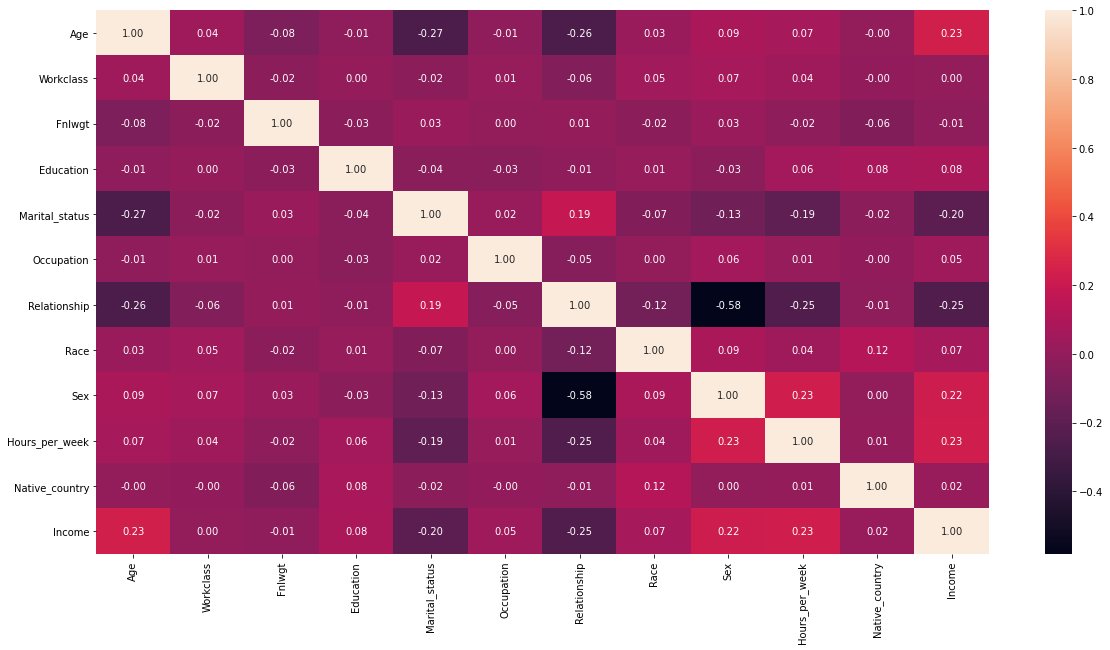

In [213]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

<AxesSubplot:>

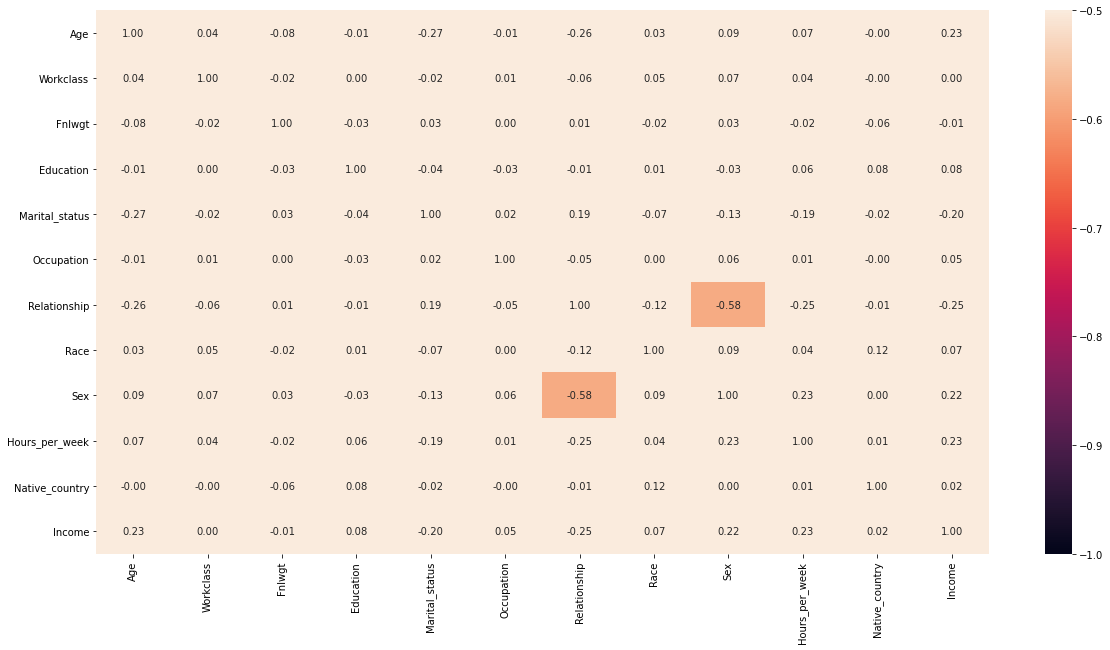

In [214]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -0.5, vmax = -1)

Observation: 
    
    We can see that Relationship and Sex has a negative correlation

<AxesSubplot:>

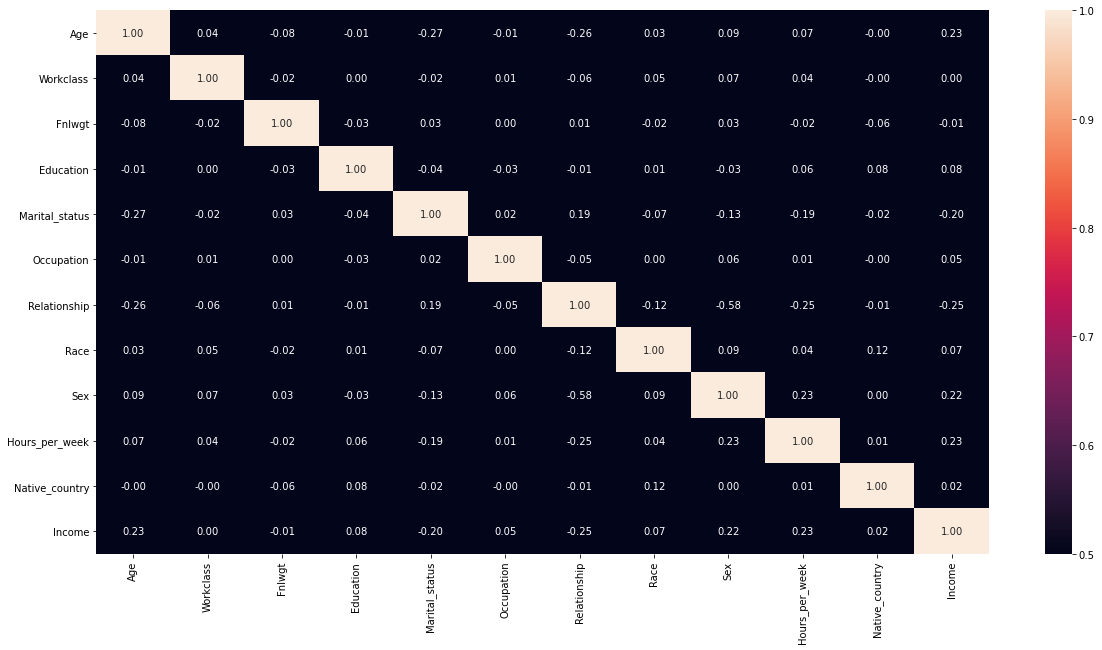

In [215]:
#Highlighting all the values greater than 0.5
#Plot to highlight high positive correlations.
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

    There are no columns with high positive correlation

<AxesSubplot:>

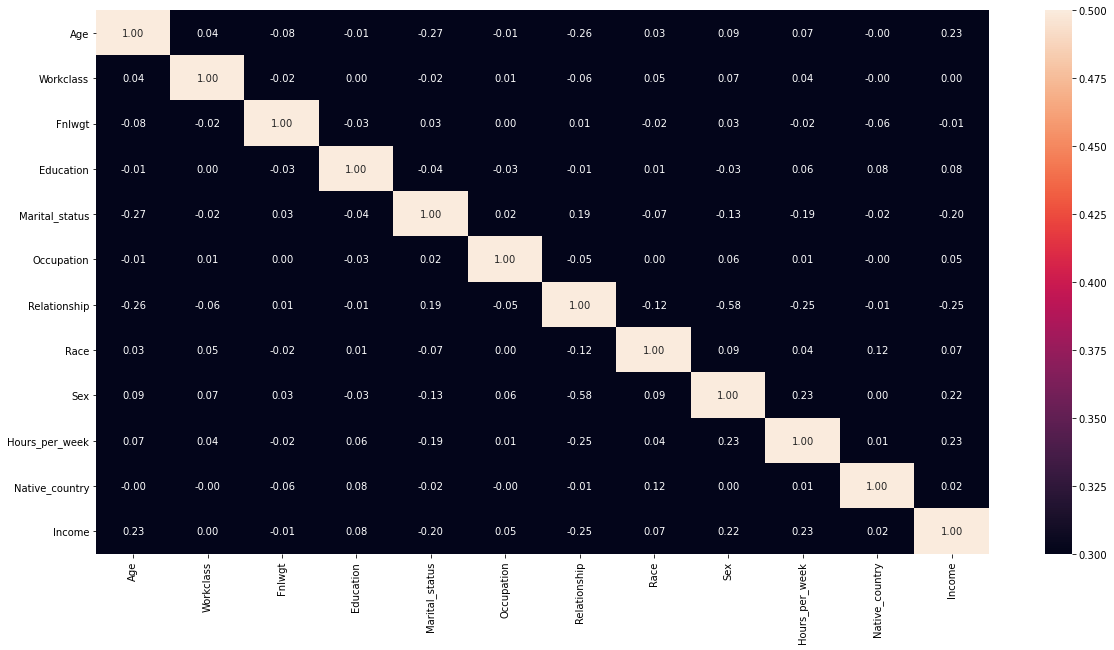

In [216]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.3, vmax = 0.5)

    No columns has high correlation 

### Checking outliers

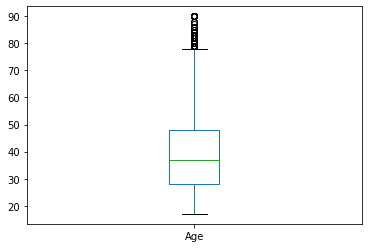

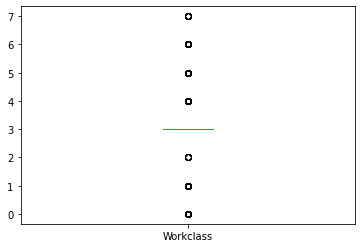

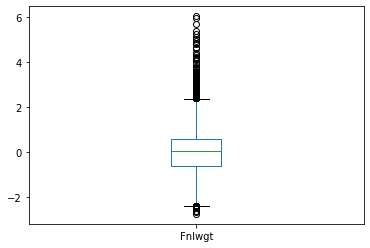

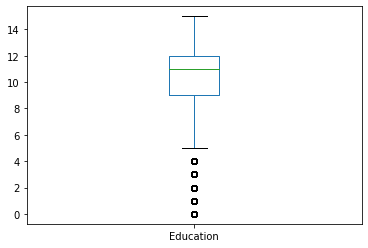

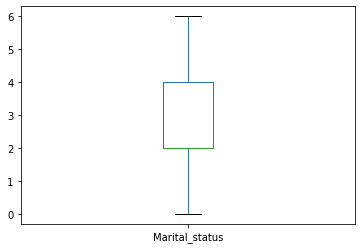

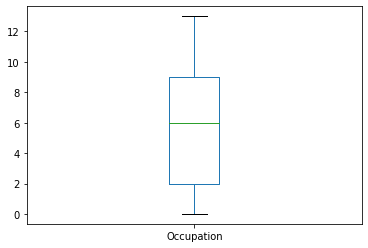

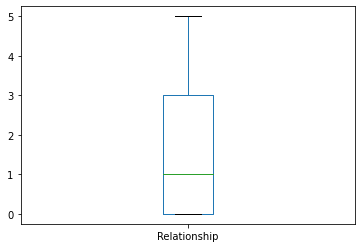

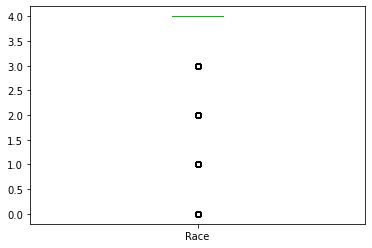

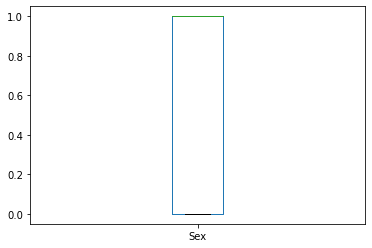

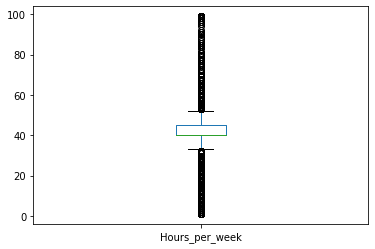

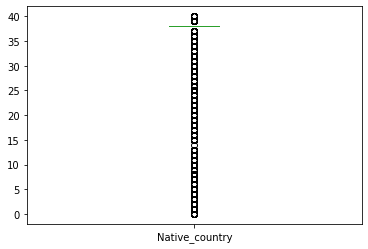

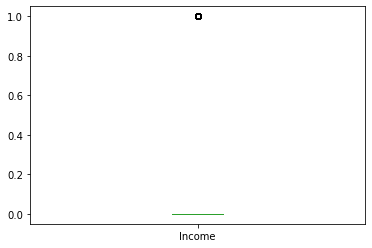

In [235]:
for i in df.columns: 
    df[i].plot.box()
    plt.show()

Observation: 
    
    We can see that the following columns has outliers
        Age - Valid
        Workclass - Invalid - categorical
        Fnlwgt - Valid 
        Education - Invalid - categorical
        Education_num - Invalid - categorical
        Race - Invalid - categorical
        Hours_per_week - Valid
        Native_country - Invalid - categorical
        Income - Invalid - categorical

### Dealing with outliers

In [218]:
from scipy.stats import zscore

In [219]:
numer_cols = ['Age', 'Fnlwgt', 'Hours_per_week']
for i in numer_cols:
    z = np.abs(zscore(df[i]))
    threshold = 3
np.where(z>3)

(array([    9,    27,    76,   156,   188,   271,   298,   519,   588,
          934,  1033,  1035,  1063,  1065,  1171,  1199,  1261,  1271,
         1410,  1416,  1457,  1499,  1683,  1729,  1823,  1886,  1928,
         1986,  2014,  2332,  2357,  2428,  2443,  2593,  2760,  2919,
         2931,  2958,  2962,  3091,  3224,  3290,  3301,  3342,  3577,
         3748,  3772,  3908,  4085,  4090,  4100,  4235,  4293,  4307,
         4311,  4336,  4347,  4440,  4567,  4735,  4777,  4861,  5084,
         5171,  5241,  5375,  5431,  5467,  5488,  5506,  5589,  5593,
         5631,  5681,  5765,  5807,  5876,  5915,  6069,  6083,  6179,
         6379,  6389,  6474,  6523,  6617,  6692,  6742,  6743,  6821,
         6845,  6897,  7026,  7099,  7141,  7526,  7579,  7605,  7677,
         7808,  7809,  7862,  8037,  8044,  8068,  8071,  8148,  8159,
         8223,  8374,  8392,  8409,  8430,  8446,  8550,  8583,  8627,
         8633,  8653,  8668,  8703,  8710,  8744,  8779,  8795,  8822,
      

    Since there are only less number of outliers, we can proceed without removing them

### Checking the skewness

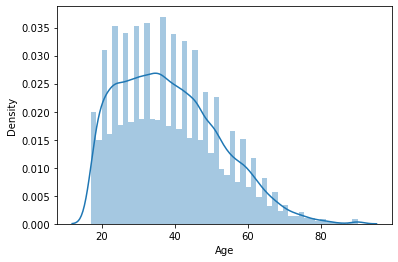

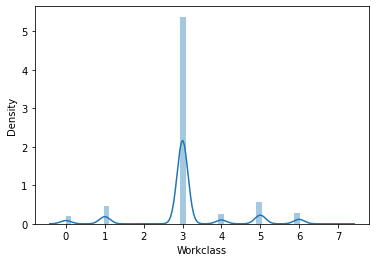

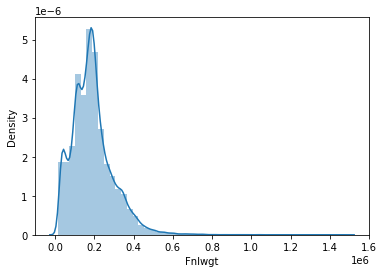

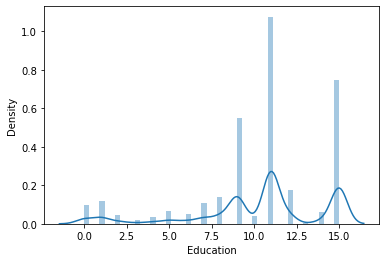

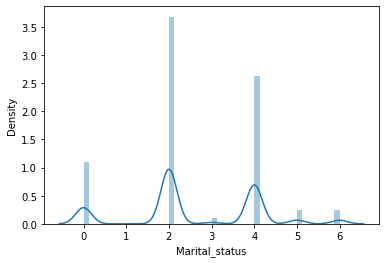

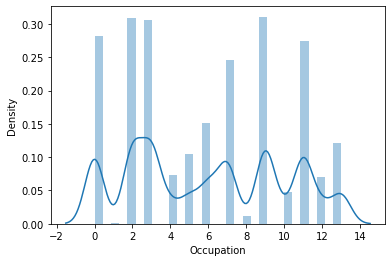

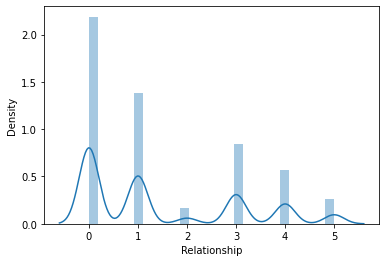

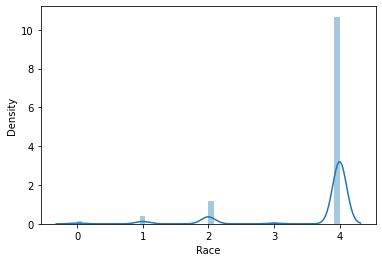

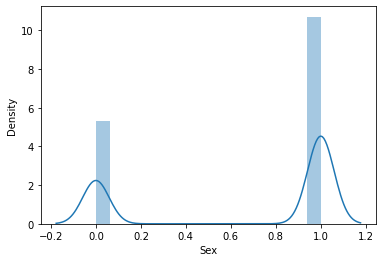

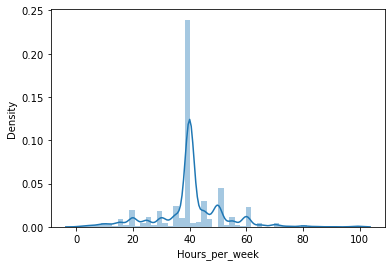

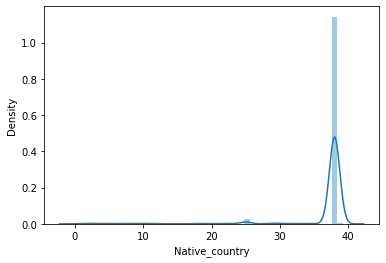

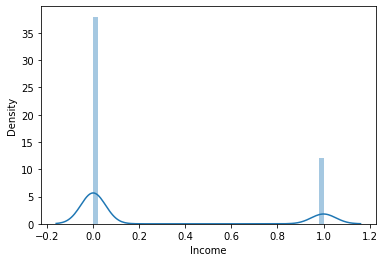

In [220]:
for i in df.columns: 
    sb.distplot(df[i], kde = True)
    plt.show()

Observation: 
    
    We can see skewness in Fnlwgt and Hours_per_week

In [221]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            1.446972
Education        -0.934063
Marital_status   -0.013448
Occupation        0.109217
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

    We can confirm the skewness in Fnlwgt

### Handling the skewness

In [222]:
from sklearn.preprocessing import PowerTransformer

In [223]:
pt = PowerTransformer(method='yeo-johnson')

In [224]:
df['Fnlwgt'] = pt.fit_transform(df['Fnlwgt'].values.reshape(-1,1))

In [225]:
df.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.934063
Marital_status   -0.013448
Occupation        0.109217
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

    We can see the skewness for Fnlwgt has been removed

### Splitting X and Y

In [226]:
x = df.drop('Income', axis = 1)
y = df['Income']

In [227]:
x.shape

(32560, 11)

In [228]:
x.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5.0,-1.089889,9.0,2.0,3.0,0.0,4.0,1.0,13,38.0
1,38,3.0,0.398743,11.0,0.0,5.0,1.0,4.0,1.0,40,38.0
2,53,3.0,0.562540,1.0,2.0,5.0,0.0,2.0,1.0,40,38.0
3,28,3.0,1.340398,9.0,2.0,9.0,5.0,2.0,0.0,40,4.0
4,37,3.0,0.957182,12.0,2.0,3.0,5.0,4.0,0.0,40,38.0


In [229]:
y.shape

(32560,)

In [230]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Income, dtype: float64

### Scaling

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
ss = StandardScaler()

In [233]:
x = ss.fit_transform(x)

In [236]:
x_col = ['Age', 'Workclass', 'Fnlwgt', 'Education',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country']
x = pd.DataFrame(x, columns = x_col)
x.head()


,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.837097,1.721336,-1.089889,-0.335443,-0.406183,-0.736897,-0.900177,0.393675,0.703087,-2.22212,0.261374
1,-0.042640,-0.085223,0.398743,0.181319,-1.734026,-0.240088,-0.277810,0.393675,0.703087,-0.03543,0.261374
2,1.057031,-0.085223,0.562540,-2.402489,-0.406183,-0.240088,-0.900177,-1.962583,0.703087,-0.03543,0.261374
3,-0.775755,-0.085223,1.340398,-0.335443,-0.406183,0.753528,2.211658,-1.962583,-1.422298,-0.03543,-5.352855
4,-0.115952,-0.085223,0.957182,0.439700,-0.406183,-0.736897,2.211658,0.393675,-1.422298,-0.03543,0.261374


### Importing the models

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [238]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

In [240]:
x_train.shape

(22792, 11)

In [241]:
x_test.shape

(9768, 11)

In [242]:
y_train.shape

(22792,)

In [243]:
y_test.shape

(9768,)

In [244]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model: 
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

Accuracy Score  :  LogisticRegression()
0.7623873873873874
[[6986  384]
 [1937  461]]
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      7370
         1.0       0.55      0.19      0.28      2398

    accuracy                           0.76      9768
   macro avg       0.66      0.57      0.57      9768
weighted avg       0.72      0.76      0.72      9768

Accuracy Score  :  GaussianNB()
0.7554258804258804
[[5749 1621]
 [ 768 1630]]
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      7370
         1.0       0.50      0.68      0.58      2398

    accuracy                           0.76      9768
   macro avg       0.69      0.73      0.70      9768
weighted avg       0.79      0.76      0.77      9768

Accuracy Score  :  SVC()
0.7994471744471745
[[6580  790]
 [1169 1229]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      7370
  

### Cross Validation

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
model = [lr, gnb, svc, rfc, dtc, knc, abc]
for m in model:
    print(m)
    score = cross_val_score(m, x, y, cv = a)
    print(score.mean(), score.std())
    print('\n')

LogisticRegression()
0.7641277641277642 0.001351351351351393


GaussianNB()
0.7586916461916462 0.0014434889434889464


SVC()
0.804514742014742 0.0010749385749385665


RandomForestClassifier()
0.8251535626535627 0.0016891891891891442


DecisionTreeClassifier()
0.768980343980344 0.0026412776412776395


KNeighborsClassifier()
0.8007371007371007 0.0002457002457002533


AdaBoostClassifier()
0.8343673218673219 0.002733415233415193




    I didn't run the for-loop for 2-10 CV values because of the large size of the dataset.
    
    Since the KNeighborsClassifier got the smallest difference, that's the model we're going to go with. 

### Re-doing the best model

In [247]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print('Accuracy score: ')
print(accuracy_score(y_test, pred_knc))
print(confusion_matrix(y_test, pred_knc))
print(classification_report(y_test, pred_knc))

Accuracy score: 
0.7966830466830467
[[6517  853]
 [1133 1265]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      7370
         1.0       0.60      0.53      0.56      2398

    accuracy                           0.80      9768
   macro avg       0.72      0.71      0.71      9768
weighted avg       0.79      0.80      0.79      9768



### AUC_ROC Curve

In [248]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [249]:
y_pred_prob = gnb.predict_proba(x_test)[:, 0]

In [250]:
y_pred_prob

array([0.06775196, 0.83016036, 0.99320712, ..., 0.83536209, 0.68506298,
       0.99998922])

In [251]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [252]:
fpr

array([0.00000000e+00, 1.35685210e-04, 2.84938942e-03, ...,
       9.99728630e-01, 9.99728630e-01, 1.00000000e+00])

In [253]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99791493, 1.        ,
       1.        ])

In [254]:
thresholds

array([1.99999996, 0.99999996, 0.99999964, ..., 0.02967952, 0.02391849,
       0.01858621])

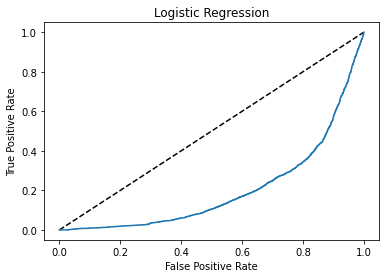

In [255]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [256]:
auc_score = roc_auc_score(y_test, lr.predict(x_test))

In [257]:
print(auc_score)

0.5700702077601981


    We're getting a 73% accuracy in the model

### GridSearchCV

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
parameters = {'n_neighbors': [3, 5, 7, 9, 11]}
knc = KNeighborsClassifier()
knccv = GridSearchCV(knc, parameters)
knccv.fit(x_train, y_train)

print(knccv.best_params_)

{'n_neighbors': 11}


In [267]:
knc_final = KNeighborsClassifier(n_neighbors = 11)
knc_final.fit(x_train, y_train)
pred_knc = knc_final.predict(x_test)
print('Accuracy Score  : ', knc_final)
print(accuracy_score(y_test, pred_knc))
print(confusion_matrix(y_test, pred_knc))
print(classification_report(y_test, pred_knc))

Accuracy Score  :  KNeighborsClassifier(n_neighbors=11)
0.8038493038493039
[[6587  783]
 [1133 1265]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      7370
         1.0       0.62      0.53      0.57      2398

    accuracy                           0.80      9768
   macro avg       0.74      0.71      0.72      9768
weighted avg       0.80      0.80      0.80      9768



    We're getting 80% for this model

In [268]:
data = [pred_knc, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Predicted,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Actual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating OBJ File

In [269]:
import joblib

In [270]:
joblib.dump(knc_final, 'Census_Income.obj')

['Census_Income.obj']

### Re-importing the model

In [271]:
final = joblib.load('Census_Income.obj')
final.predict(x_train)

array([0., 0., 0., ..., 0., 1., 0.])

### Conclusion

In [272]:
conclusion = pd.DataFrame([final.predict(x_test)[:], pred_knc[:]], index = ['Predicted', 'Original'])

In [273]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
Predicted,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Original,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
